<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/(Shared)Case_Study_2_(Facial_Recognition)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case study 2 - facial recognition**
Our 2nd  case study will be to predict the labels for image data with a popular dataset called
the Labeled Faces in the Wild dataset from the scikit-learn library. The dataset is called
the Olivetti Face dataset and it comprises pictures of famous people's faces, with
appropriate labels. Our task is that of facial recognition, a supervised machine learning
model that is able to predict the name of the person given an image of their face

# **Step-1: Load the dataset**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
# the olivetti face dataset
from sklearn.datasets import fetch_lfw_people
# feature extraction modules
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# feature scaling module
from sklearn.preprocessing import StandardScaler
# standard python modules
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# this ensures that your plotting will show directly in your jupyter notebook
# scikit-learn model selection modules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)



# Let's inspect the image arrays to find shapes for plotting the images. We can do
#this with the following code:

n_samples, h, w = lfw_people.images.shape
n_samples, h, w
target_names = lfw_people.target_names



# **Step-2: Check the  number of samples are present in  the dataset.**


**Now, let's set up the X and y for our machine learning pipeline. We will grab
the data attribute of the lfw_people object:**


In [64]:
# for machine learning we use the data directly (as relative pixel positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]
X.shape, y.shape

((1288, 1850), (1288,))

# **Step 3 : Plot the first image  for visualisation.**

In [97]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        # print(images[i].shape)
        resh = images[i].reshape((h, w))
        # print(resh.shape)
        plt.imshow(resh, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

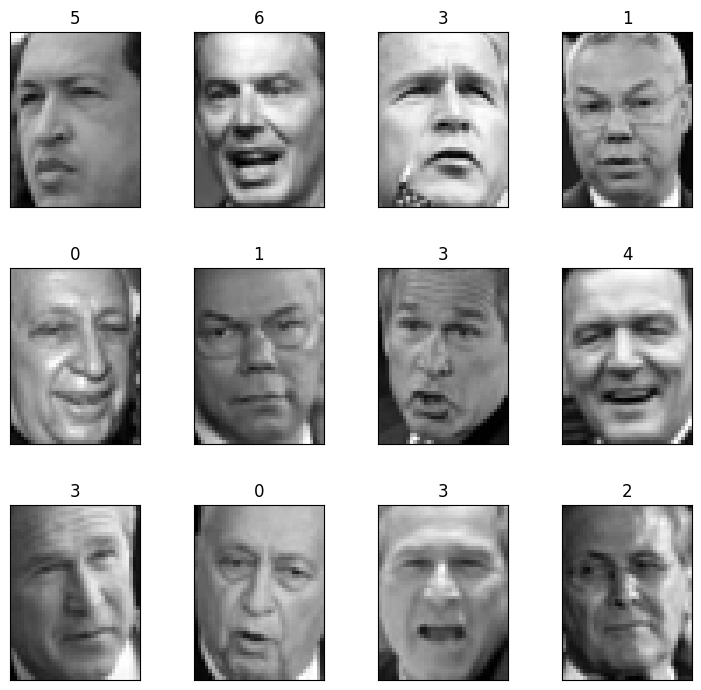

In [98]:
plot_gallery(X, y, h, w)

# **Step 4: Use standard scaler to preprocess the data and visualise first sample again to check if there is any changes in the figure.**

In [99]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)

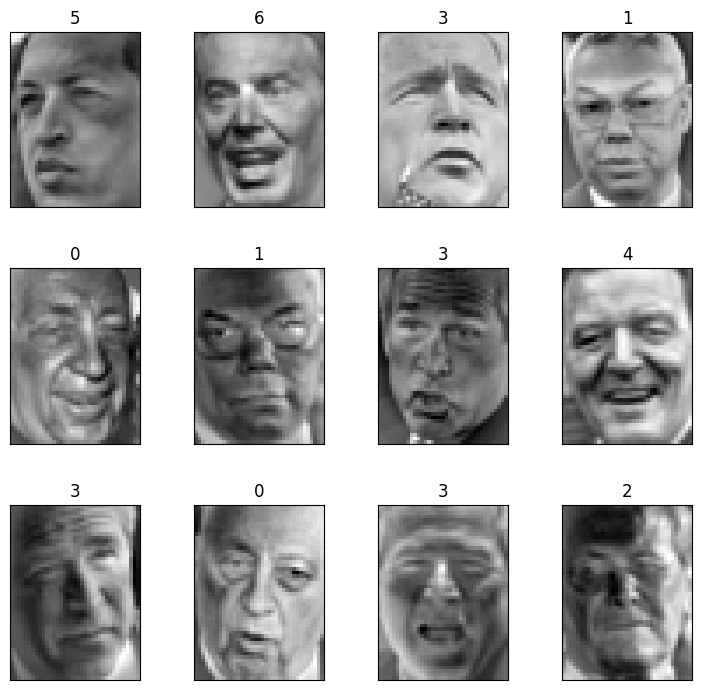

In [100]:
plot_gallery(X_std, y, h, w)

# **Step 5: Let's create train and test dataset by splitting the original data into 3:1 ratio (Keep random state =1).**

In [101]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((966, 1850), (322, 1850), (966,), (322,))

#**Step 6: Instantiate the  PCA module  and Create a pipeline having standard scaler and PCA in it.**

In [133]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
n_components = 20

pipe = Pipeline([("std",StandardScaler()), ("pca",PCA(n_components=n_components,svd_solver="randomized", whiten=True))])
pipe

Pipeline(steps=[('std', StandardScaler()),
                ('pca',
                 PCA(n_components=20, svd_solver='randomized', whiten=True))])

#**Step 7: Fit the above pipeline on training data.**

In [134]:
X_change=pipe.fit_transform(X_train, y_train)

# **Step 8: Try to plot the figure using different number of component and see the changes.**

In [135]:
X_change.shape

(966, 20)

In [136]:


print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = pipe.fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pipe.named_steps['pca'].components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pipe.transform(X_train)
X_test_pca = pipe.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 20 eigenfaces from 966 faces
done in 0.530s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.093s


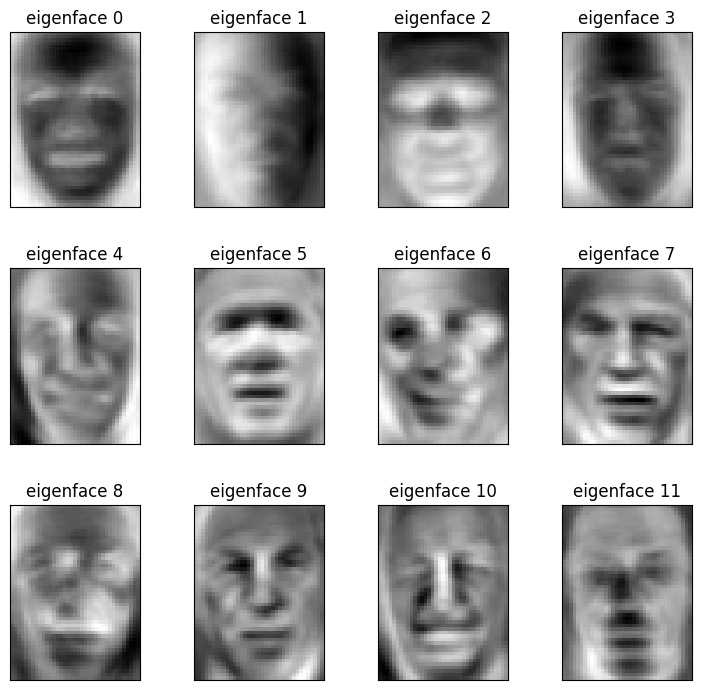

In [137]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

# **Step 9: Plot  the graph for  F1 score vs  diffrent number of  compnents (1 to 10).**

In [138]:
from sklearn.utils.fixes import loguniform
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 5.829s
Best estimator found by grid search:
SVC(C=16754.17696791633, class_weight='balanced', gamma=0.039250323754620266)


Predicting people's names on the test set
done in 0.030s
                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.74      0.72        19
     Colin Powell       0.74      0.82      0.78        55
  Donald Rumsfeld       0.79      0.76      0.78        25
    George W Bush       0.91      0.89      0.90       142
Gerhard Schroeder       0.77      0.74      0.75        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.73      0.71      0.72        34

         accuracy                           0.82       322
        macro avg       0.79      0.78      0.78       322
     weighted avg       0.83      0.82      0.82       322



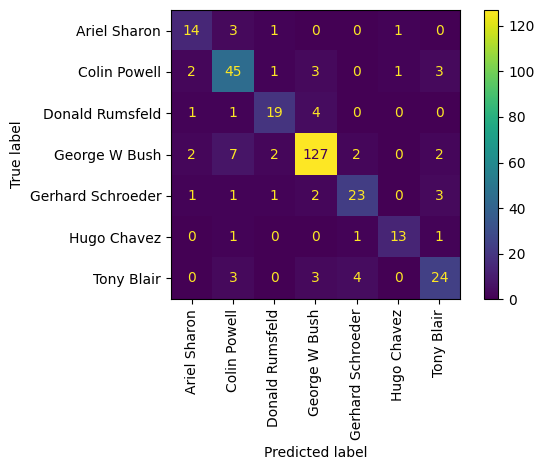

In [127]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()
